# EDA 연습

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
filename = 'housing.csv'
housing = pd.read_csv(filename) 

In [3]:
housing
# 왼쪽 : 인덱스 (판다스의 행 번호)
# 위쪽 : 열 제목 (csv 파일의 첫줄을 자동으로 인식해 열 제목으로 바꿔줌)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
housing.shape
# 데이터 506건, 변수 14개

# 선형회귀의 생각 : 예측할 변수(출력)는 하나, 예측을 설명해주는 변수(입력)는 '최대' 13개

(506, 14)

In [5]:
housing.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

isnull() :결측값 확인 (결측값이면 True, 아니면 False) 

In [6]:
housing.isnull()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

변수당 결측값의 개수 확인 (이 경우엔 없다)

In [7]:
# 복습 : 계산할때 False는 0, True는 1로 취급

housing.isnull().sum()

# 컬럼 당 null인 값의 총 갯수 == True인 것의 총갯수

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# 분석 학습용 데이터라서 결측치가 없도록 전처리되었음

# 분석의 성능을 좋게 하기 위한 방법 중 문제마다 다양한 결측치 처리 기법 :
# 1) 데이터를 삭제
# 2) 데이터를 대체 (0으로, 평균으로, 중앙값으로, 근처 값으로 / 범주형이면 빈도가 높은 값으로)

In [9]:
housing.info()
# 바로 info 하면 정보가 너무 많아서 헷갈릴 수 있음
# 한번에 정보가 많이 나오는건 해석하거나 이해하기에 좋지 않다 (특히 발표시)

# Non-Null Count 널값(누락값)이 있는 행이 있다면, 그 행에서 널이/몇개인지 
# 있으면 다른 행이랑 갯수가 안맞다 (역시 한번 더 생각해야 한다)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


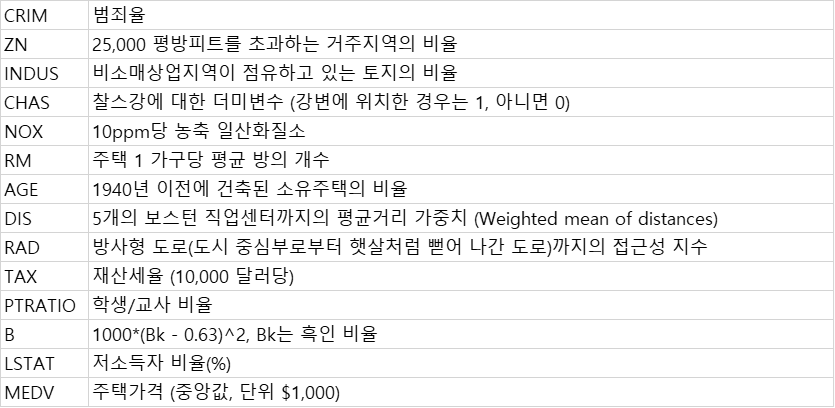

CHAS, RAD가 범주형
> 범주형 변수의 unique 값들과 각각의 개수

In [10]:
# CHAS의 고유값 확인

housing['CHAS'].unique()

array([0, 1], dtype=int64)

In [11]:
# 강변에 있는 집이 많을까 없는게 많을까?

housing['CHAS'].value_counts()

# 이 경우 '위치가 강변인가 아닌가'를 예측하는 모델을 만들긴 힘들다 (데이터 편중)

0    471
1     35
Name: CHAS, dtype: int64

In [12]:
# RAD의 고유값 확인 : 클수록 방사형 도로에 대한 접근성 좋음

housing['RAD'].unique() # 중간에 빈 값이 많다

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [13]:
housing['RAD'].value_counts() # 도로 부근에 쏠려있거나 멀리있다 (중간이 없다)

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [14]:
housing['CHAS'].value_counts(normalize=True)*100 # 퍼센트 

0    93.083004
1     6.916996
Name: CHAS, dtype: float64

In [15]:
housing['RAD'].value_counts(normalize=True)*100 # 퍼센트 

24    26.086957
5     22.727273
4     21.739130
3      7.509881
6      5.138340
2      4.743083
8      4.743083
1      3.952569
7      3.359684
Name: RAD, dtype: float64

In [16]:
housing.describe()
# 바로 describe 하면 역시 변수도, 정보도 너무 많아서 헷갈릴 수 있음
# 한번에 정보가 많이 나오는건 좋지 않다

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [17]:
# 원래 이걸 해놓고 나서 한참을 들여다 보는거 (변수명과 데이터 설명서를 보면서 통계값을 하나씩 확인)

# 한눈에 들어오지 않으면 변수별로 하나씩 describe() 
# 그래도 어려우면 변수별로 하나씩... 개별로... mean, median, min, max...

### 기준이 되는 변수를 잡으면 쉽다

Tip : **'범주형' 컬럼을 기준**으로 삼아, **'수치형' 변수들의 기초통계**를 그룹별로 보자

In [18]:
housing.groupby('CHAS')['MEDV'].mean() # 강변이면 집값이 비싸다

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [19]:
housing.groupby('CHAS')['CRIM'].mean() # 강변이면 범죄율도 적다 (인구밀도와 연관??)

CHAS
0    3.744447
1    1.851670
Name: CRIM, dtype: float64

In [20]:
housing.groupby('CHAS')['AGE'].mean() # 오래된 집이 많다 (구도시)

CHAS
0    67.911677
1    77.500000
Name: AGE, dtype: float64

In [21]:
housing.groupby('RAD')['MEDV'].mean() # 도로 근처에 싼 집이 몰려있다 (중간지역이 비었다)

RAD
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: MEDV, dtype: float64

시각화를 하는 이유 - 훨씬 한눈에 알아보기 쉽다

In [22]:
import seaborn as sns

C:\Users\ASNKMGSK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHAS', ylabel='count'>

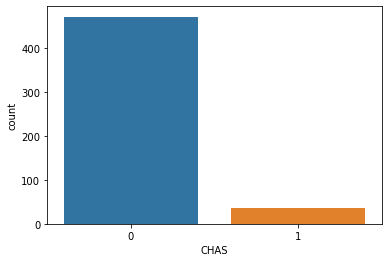

In [23]:
sns.countplot(housing['CHAS'])

C:\Users\ASNKMGSK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAD', ylabel='count'>

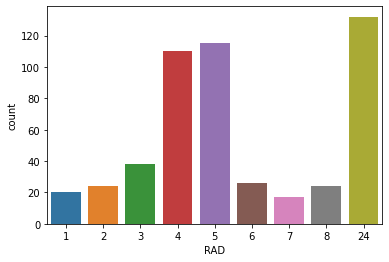

In [24]:
sns.countplot(housing['RAD'])

<AxesSubplot:xlabel='RAD', ylabel='count'>

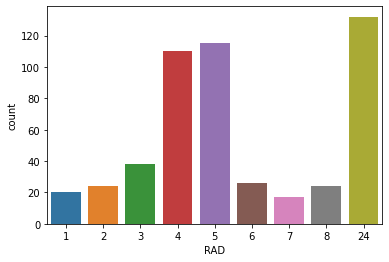

In [25]:
sns.countplot(x='RAD', data=housing)

<AxesSubplot:xlabel='RAD', ylabel='Count'>

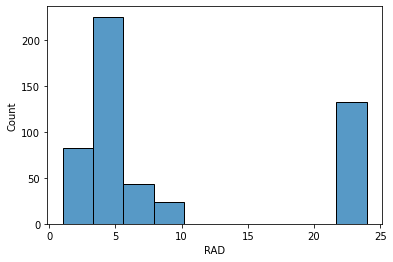

In [26]:
sns.histplot(housing['RAD'])

<AxesSubplot:xlabel='RAD', ylabel='Count'>

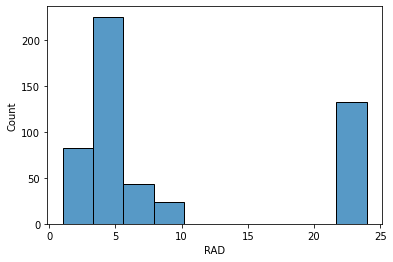

In [27]:
sns.histplot(x='RAD', data=housing)

<AxesSubplot:xlabel='RAD', ylabel='Count'>

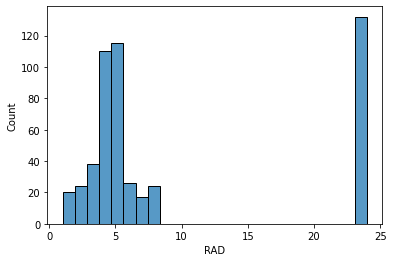

In [28]:
sns.histplot(x='RAD', data=housing, bins=25)

### 시각화 해보면 분명히 알게된다

그룹별 시각화 - **범주형** 변수 기준으로 **연속형** 변수 관찰

<AxesSubplot:xlabel='AGE', ylabel='Count'>

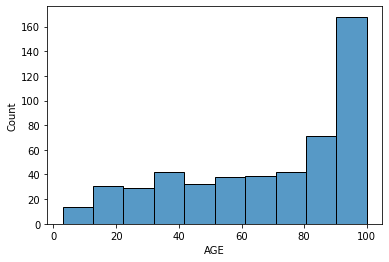

In [29]:
sns.histplot(x='AGE', data=housing)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

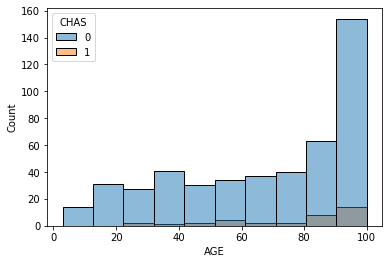

In [30]:
sns.histplot(x='AGE', hue='CHAS', data=housing)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

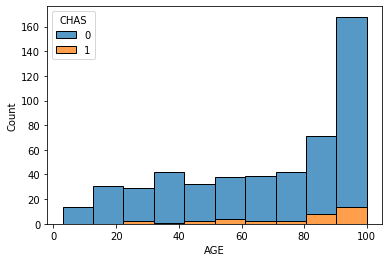

In [31]:
sns.histplot(x='AGE', hue='CHAS', multiple='stack', data=housing)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

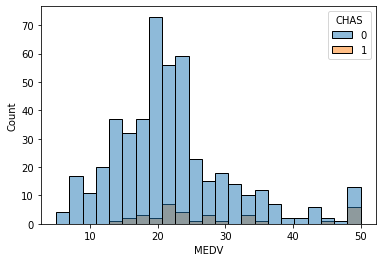

In [32]:
sns.histplot(x='MEDV', hue='CHAS', data=housing) 

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

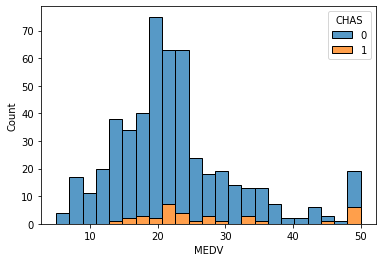

In [33]:
sns.histplot(x='MEDV', hue='CHAS', multiple='stack', data=housing) 

<AxesSubplot:xlabel='DIS', ylabel='Count'>

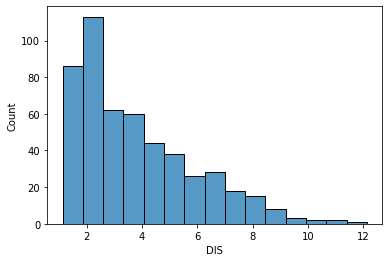

In [34]:
sns.histplot(x='DIS', data=housing)

DIS - weighted distances to five Boston employment centres. 

<AxesSubplot:xlabel='DIS', ylabel='Count'>

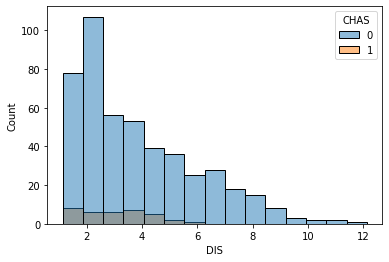

In [35]:
sns.histplot(x='DIS', hue='CHAS', data=housing)

# 상관분석 및 시각화

In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
filename = 'housing.csv'
housing = pd.read_csv(filename) 

In [39]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

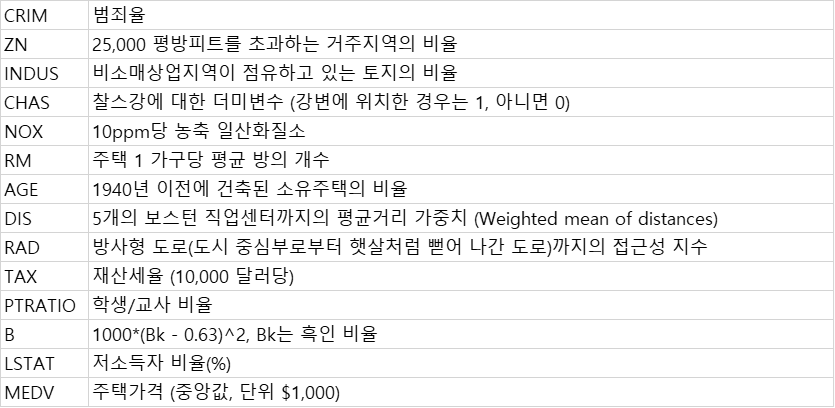

### 변수 사이의 관계 시각화 (EDA)

<AxesSubplot:xlabel='DIS', ylabel='AGE'>

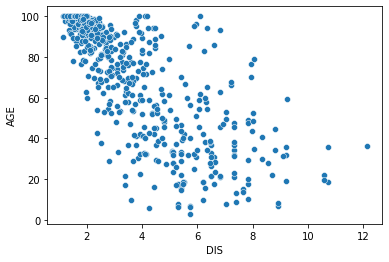

In [40]:
sns.scatterplot(x='DIS', y='AGE', data=housing) 

<AxesSubplot:xlabel='DIS', ylabel='NOX'>

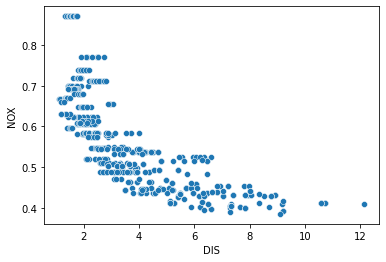

In [41]:
sns.scatterplot(x='DIS', y='NOX', data=housing) 

<AxesSubplot:xlabel='DIS', ylabel='INDUS'>

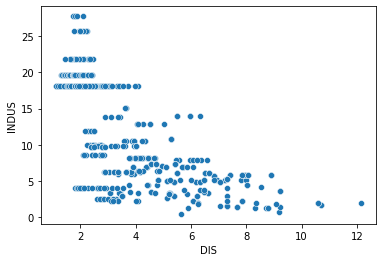

In [42]:
sns.scatterplot(x='DIS', y='INDUS', data=housing)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

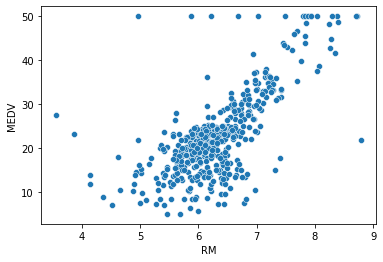

In [43]:
sns.scatterplot(x='RM', y='MEDV', data=housing)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

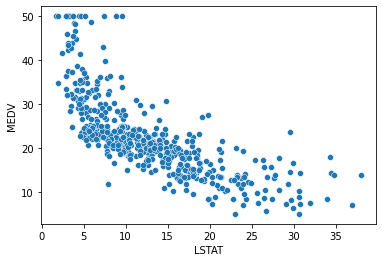

In [44]:
sns.scatterplot(x='LSTAT', y='MEDV', data=housing)

### 변수 사이의 관계 정량화 (상관계수)

In [45]:
housing[['RM', 'MEDV']].corr(method='pearson')

RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000

In [46]:
housing[['LSTAT', 'MEDV']].corr(method='pearson')

LSTAT      MEDV
LSTAT  1.000000 -0.737663
MEDV  -0.737663  1.000000

In [47]:
corr = housing.corr(method='pearson')
corr 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

heatmap으로 전체 변수 사이의 관계를 한번에 보기

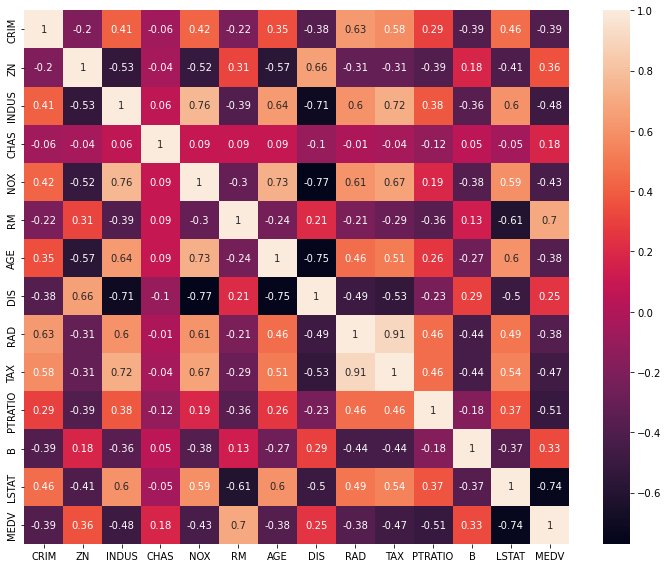

In [48]:
plt.figure(figsize=(10, 8))

sns.heatmap(housing.corr().round(2), annot=True)

plt.tight_layout()

### 참고 : Anscombe's quartet

Frank Anscombe이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프

- 앤스콤 4분할 그래프를 구성하는 4개의 데이터 그룹은 각각 평균, 분산, 상관관계가 모두 같다는 특징이 있다

- 이런 결과를 통해 수치상으로는 4개 그룹의 데이터는 모두 같을 것이라고 착각할 수 있다

- 그러나 각 데이터 그룹을 시각화하면 그룹들이 모두 다른 패턴을 가지고 있다는 것을 알 수 있다

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [50]:
anscombe = sns.load_dataset('anscombe')
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

4개의 데이터 그룹은 각각 평균, 분산, 표준편차가 모두 같다

In [51]:
print(anscombe.groupby('dataset')[['x','y']].mean())
print(anscombe.groupby('dataset')[['x','y']].var())
print(anscombe.groupby('dataset')[['x','y']].std())

           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
            x         y
dataset                
I        11.0  4.127269
II       11.0  4.127629
III      11.0  4.122620
IV       11.0  4.123249
                x         y
dataset                    
I        3.316625  2.031568
II       3.316625  2.031657
III      3.316625  2.030424
IV       3.316625  2.030579


각 데이터 그룹을 시각화하면 그룹들이 모두 다른 패턴을 가지고 있다

In [52]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

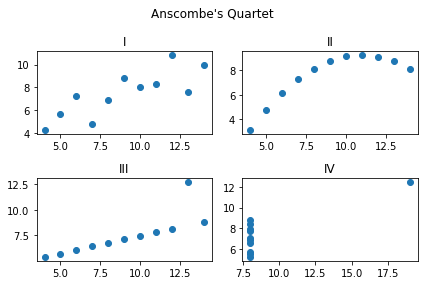

In [53]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle('Anscombe\'s Quartet')
axes1.set_title('I')
axes2.set_title('II')
axes3.set_title('III')
axes4.set_title('IV')

fig.tight_layout()

# 선형회귀 보스턴 집값 예측 분석의 결과

In [54]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [56]:
housing = pd.read_csv(filename) 

### 선형회귀 모델의 전제조건 확인 

- 선형성, 데이터 분포, 데이터 변환 필요 여부 등

- 선형성 검토 : 선형회귀 모델은 피처와 타깃값 간에 선형 관계가 있다고 가정
> 선형관계는 EDA시 .scatterplot()으로 확인

회귀선을 그어주는 시각화 .regplot()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

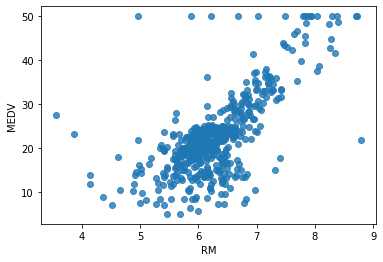

In [57]:
sns.regplot(x='RM', y='MEDV', data=housing, fit_reg=False) 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

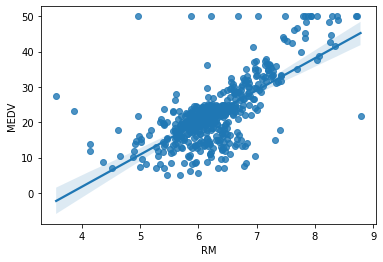

In [58]:
sns.regplot(x='RM', y='MEDV', data=housing, fit_reg=True)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

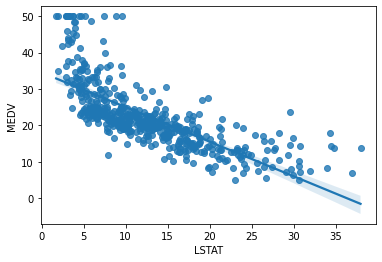

In [59]:
sns.regplot(x='LSTAT', y='MEDV', data=housing)

- 정규성 검토 : 선형회귀 모델은 피처-타깃값의 분포가 정규분포 형태에 가까워야 함
> 분포가 왜곡(skew)된 형태일 경우, 성능에 부정적인 영향을 미치므로 모델 적용 전에 스케일링, log 화 등의 처리

<AxesSubplot:xlabel='RM', ylabel='Density'>

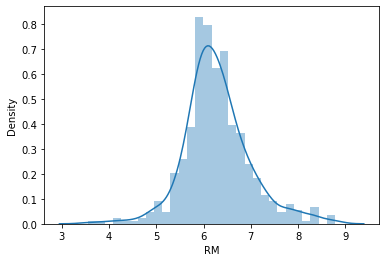

In [60]:
# 피처1(입력값) : 방의 개수

sns.distplot(housing['RM'], bins=30)

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

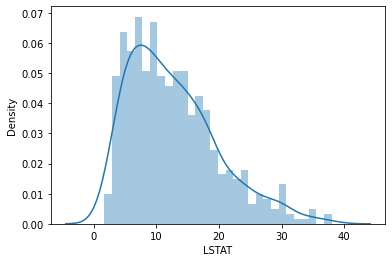

In [61]:
# 피처2(입력값) : 저소득층 비율

sns.distplot(housing['LSTAT'], bins=30)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

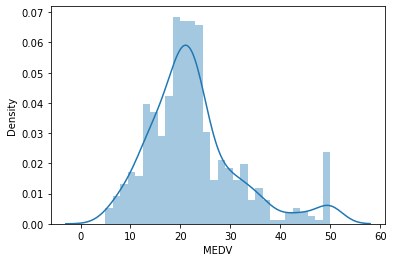

In [62]:
# 타깃(출력값) : 주택의 가격

sns.distplot(housing['MEDV'], bins=30)

목적변수인 MEDV(주택가격)은 정규분포를 이루고 있어 선형회귀 모델을 적용하기에 적절하다. 
> ($50,000 가격에 이상치가 조금 있으나 제거할 정도는 아닌 것으로 판단됨)

실제 분석에서는 변수들의 분포를 보고 사용할 변수를 선택한다
> 분포가 skewing된 변수는 제외하거나 전처리한다

- 참고 : 모든 변수의 분포와 변수 사이의 관계들 시각화하는 pairplot() 
> 한번에 지나치게 많은 정보를 주며 계산량이 오래 걸리니 적절히 활용하자 

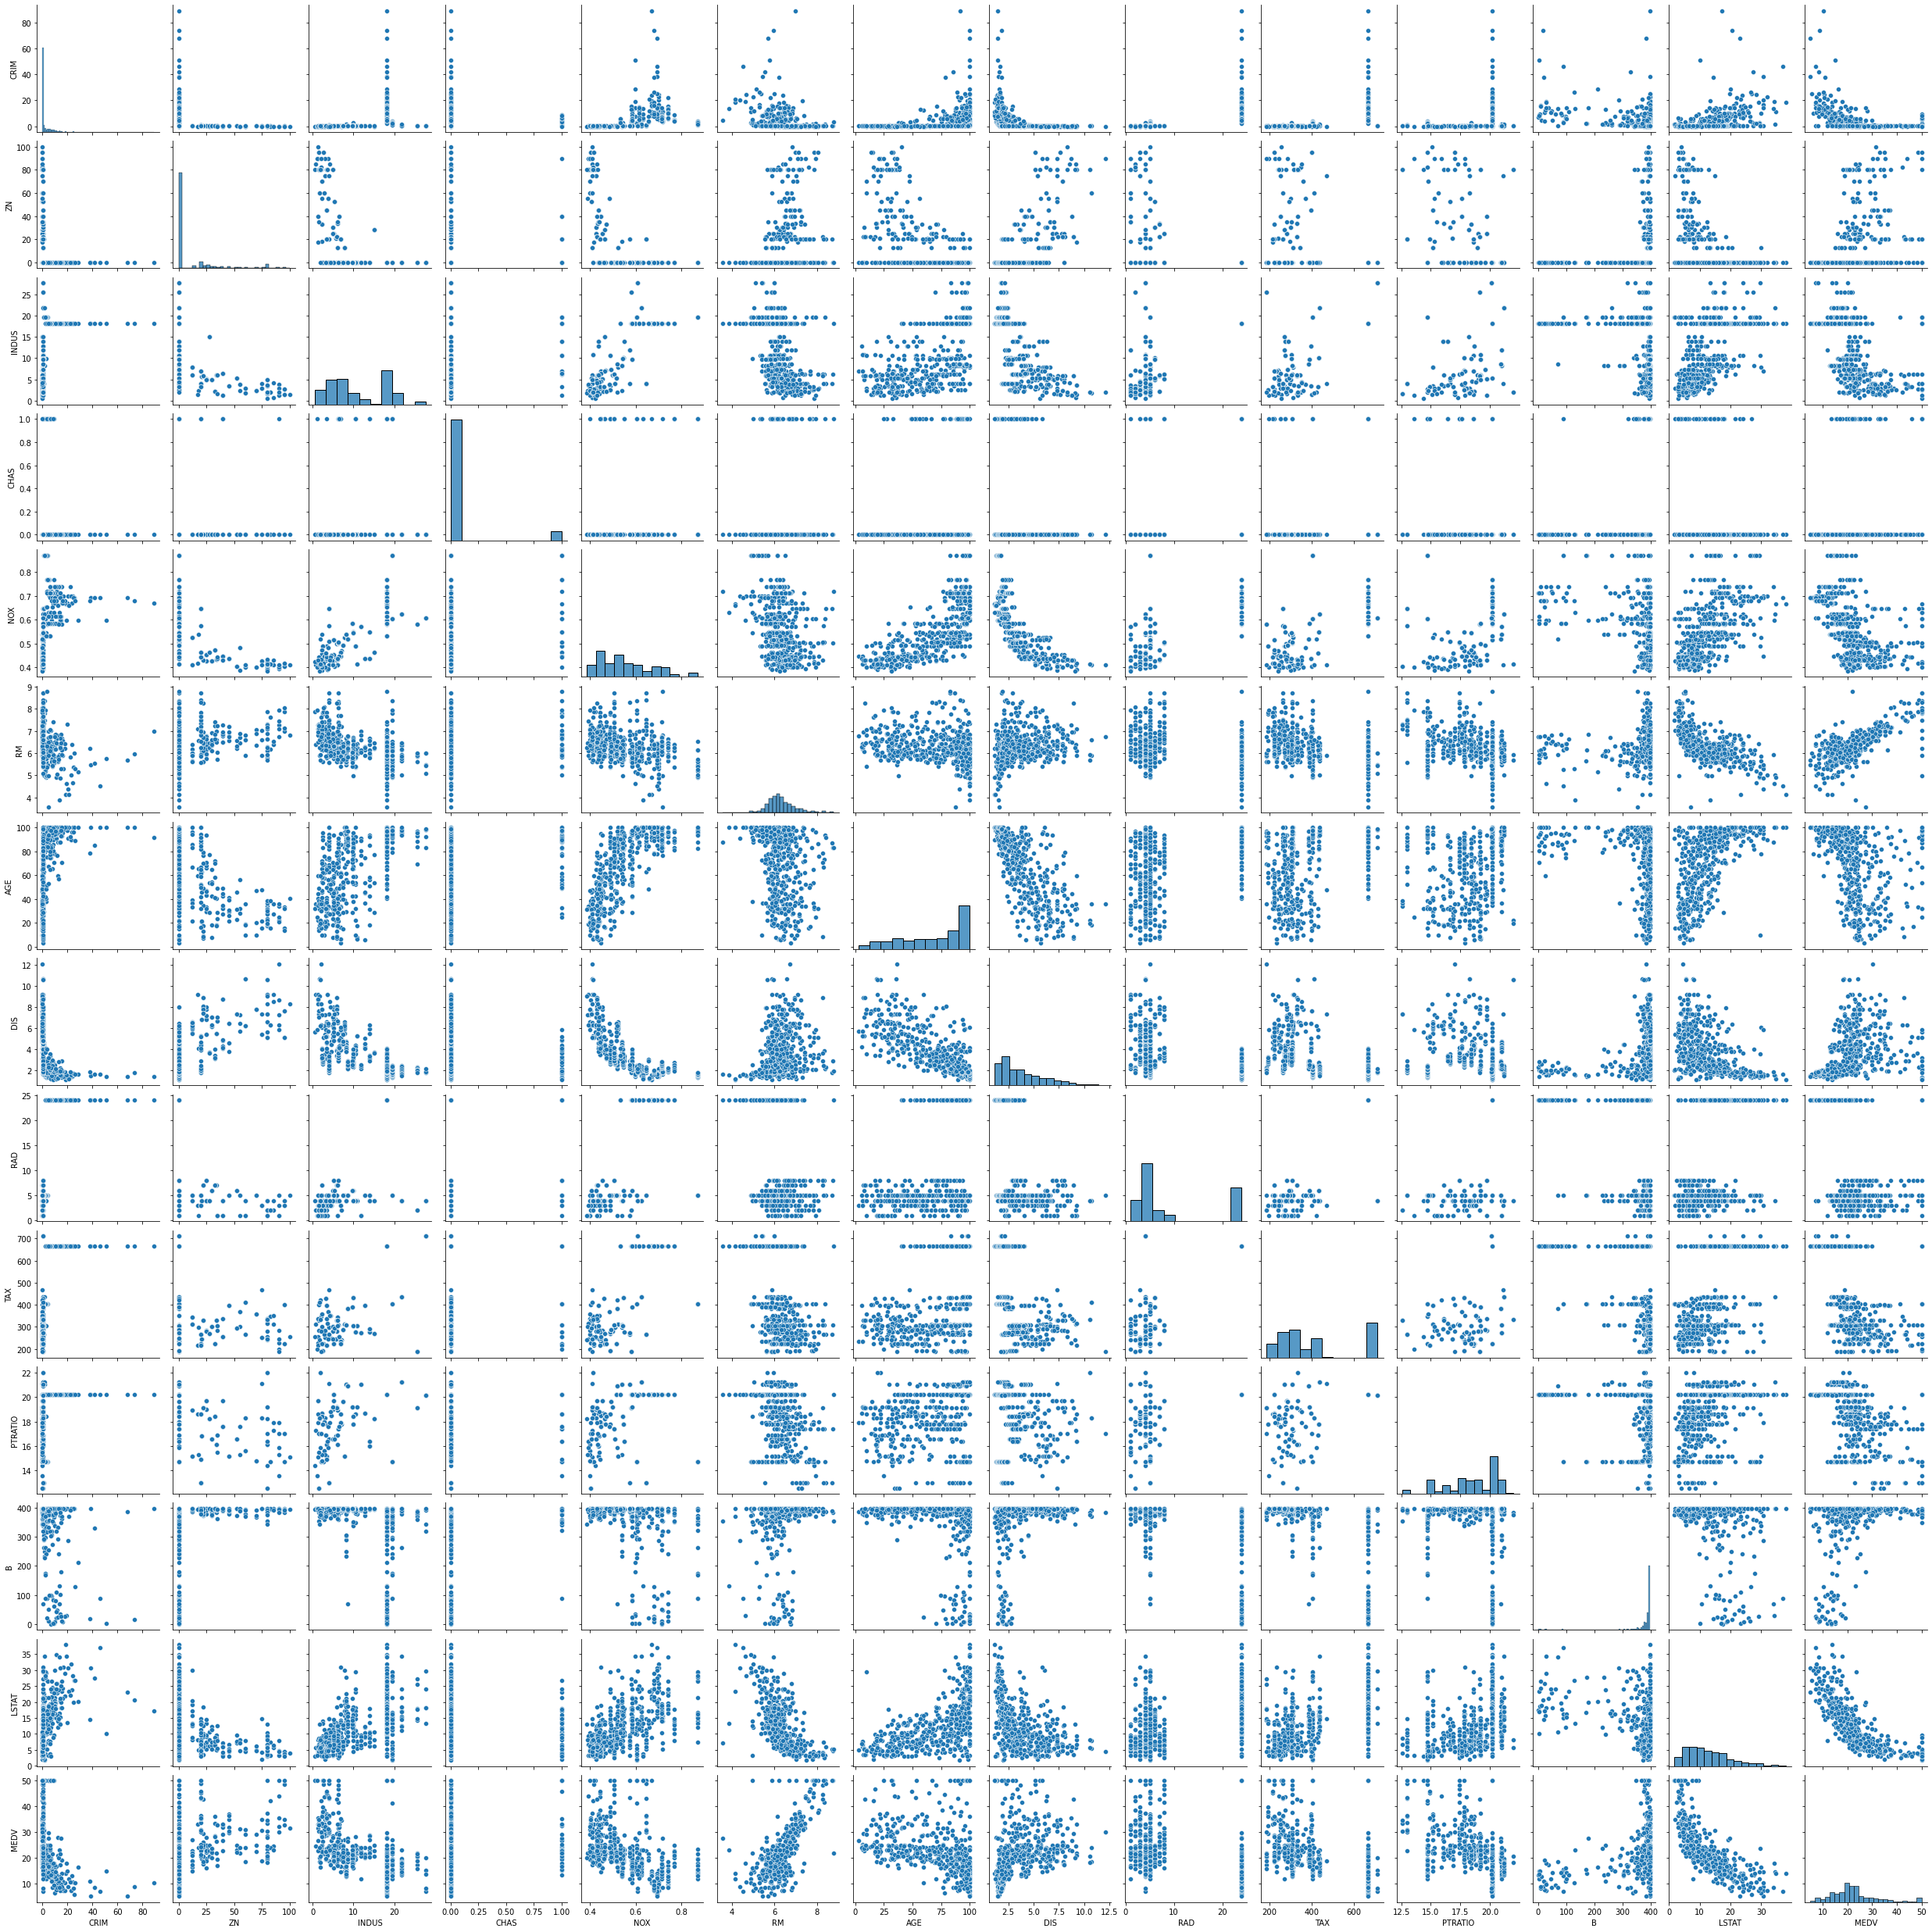

In [63]:
sns.pairplot(housing)

- hue 옵션은 '분류'가 목적인 분석의 EDA 시각화에 적합하다 (ex: iris)
> boston 집값 분석에는 큰 도움이 되지 않는다 (데이터가 겹쳐서 잘 안나눠짐)

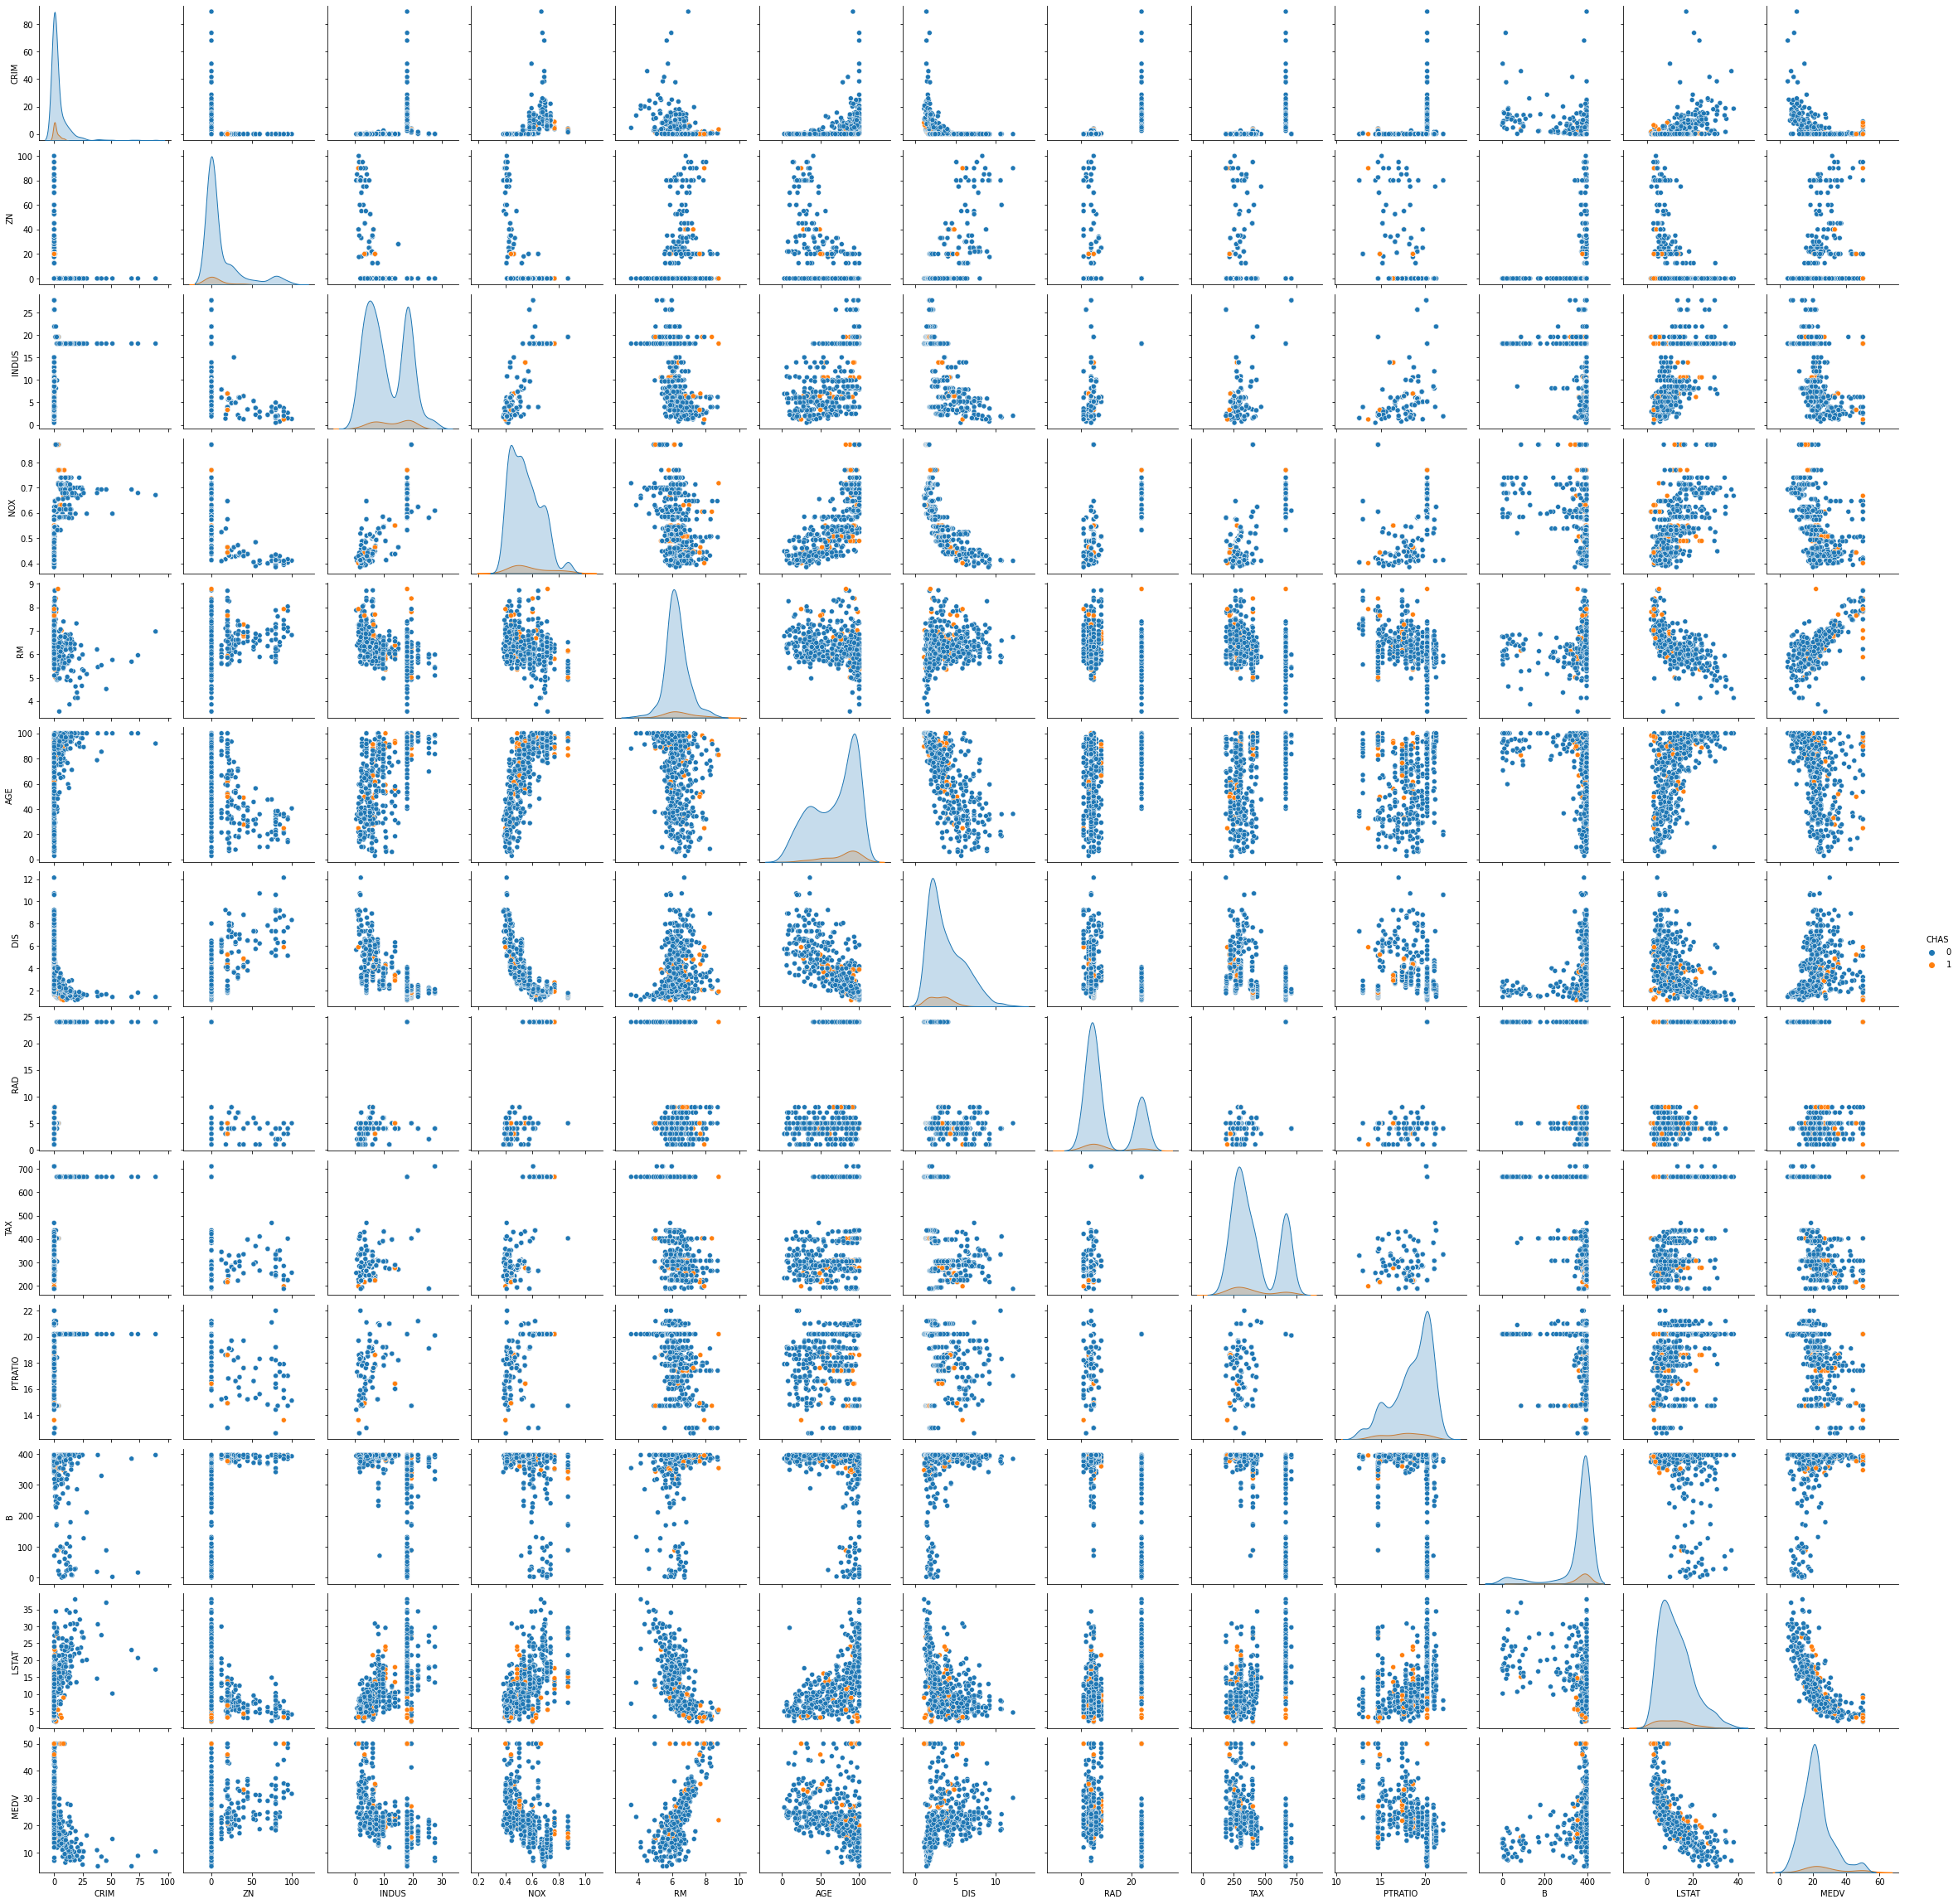

In [64]:
sns.pairplot(housing, hue='CHAS')

### 1. 단순선형 회귀모델 머신러닝

- 집 가격을 방의 개수로 예측
- MEDV ~ RM

0) 입력변수, 출력변수 결정

In [65]:
y_target = housing['MEDV'] # 출력값
X_data = housing[['RM']] # 입력값 : 2차원 배열(array로) 만들기 위해 [[]] 사용

# sklearn이 들어올 거라고 기대하는 데이터의 형식은 array
# 입력 변수가 하나라도 2차원 배열로 선언을 해야 한다(중요)

In [66]:
housing[['RM']]

RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]

In [67]:
housing['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

1) 입력값, 출력값들을 각각 train, test 테스트셋으로 분리

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모델 선언 : 선형회귀 

In [69]:
model = LinearRegression()

3) 모델 학습

In [70]:
model.fit(X_train, y_train)

LinearRegression()

4) 실제값과 학습된 모델을 통해 예측한 값 비교

In [71]:
y_test_preds = model.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_preds})
df2 = df1.head(10)
print(df2)

     Actual  Predicted
173    23.6  23.732383
274    32.4  26.929502
491    13.6  19.684568
72     22.8  20.451129
452    16.1  22.619935
76     20.0  22.451666
316    17.8  19.039536
140    14.0  21.470094
471    19.6  21.984251
500    16.8  20.095894


<AxesSubplot:>

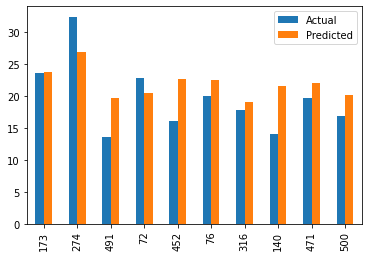

In [72]:
df2.plot(kind = 'bar')

5) 모델 성능 평가

In [73]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5050658352776293
0.3707569232254778


In [74]:
print('단순선형회귀 모형의 설명력 (R2 Score) :')
print('이 모형은 학습한 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_train, y_train)*100))
print('이 모형은 테스트 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_test, y_test)*100))

단순선형회귀 모형의 설명력 (R2 Score) :
이 모형은 학습한 데이터에서 주택가격의 50.5%를 설명한다
이 모형은 테스트 데이터에서 주택가격의 37.1%를 설명한다


### 2. 다중선형 회귀모델 - 2개의 예측변수

- 집 가격을 방의 개수와 저소득층 비율로 예측
- MEDV ~ RM + LSTAT

0) 입력변수, 출력변수 결정

In [75]:
y_target = housing['MEDV'] # 출력값 
X_data = housing[['RM', 'LSTAT']] # 입력값

1) 입력값, 출력값들을 각각 train, test 테스트셋으로 분리

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모델 선언 : 선형회귀

In [77]:
model = LinearRegression()

3) 모델 학습

In [78]:
model.fit(X_train, y_train)

LinearRegression()

4) 모델 성능 평가

In [79]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6501592679428922
0.5739577415025856


In [80]:
print('다중선형회귀 모형의 설명력 (R2 Score) :')
print('이 모형은 학습한 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_train, y_train)*100))
print('이 모형은 테스트 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_test, y_test)*100))

다중선형회귀 모형의 설명력 (R2 Score) :
이 모형은 학습한 데이터에서 주택가격의 65.0%를 설명한다
이 모형은 테스트 데이터에서 주택가격의 57.4%를 설명한다


### 3. 다중선형 회귀모델 - 3개의 예측변수

- 집 가격 ~ 방의 개수 + 저소득층 비율 + 교사/학생수 비율
- MEDV ~ RM + LSTAT + PTRATIO

In [81]:
y_target = housing['MEDV']
X_data = housing[['RM', 'LSTAT', 'PTRATIO']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
print('세개의 변수를 사용한 다중선형회귀 모형의 설명력 (R2 Score) :')
print('이 모형은 학습한 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_train, y_train)*100))
print('이 모형은 테스트 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_test, y_test)*100))

세개의 변수를 사용한 다중선형회귀 모형의 설명력 (R2 Score) :
이 모형은 학습한 데이터에서 주택가격의 68.6%를 설명한다
이 모형은 테스트 데이터에서 주택가격의 63.0%를 설명한다


### 4. 다중선형 회귀모델 - 모든 변수로 예측

- MEDV ~ .

In [84]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
print('모든 변수를 사용한 다중선형회귀 모형의 설명력 (R2 Score) :')
print('이 모형은 학습한 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_train, y_train)*100))
print('이 모형은 테스트 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_test, y_test)*100))

모든 변수를 사용한 다중선형회귀 모형의 설명력 (R2 Score) :
이 모형은 학습한 데이터에서 주택가격의 75.1%를 설명한다
이 모형은 테스트 데이터에서 주택가격의 66.9%를 설명한다


# 분석 다음엔 반드시 해석 - 선형회귀

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score 
# RMSE = mean_squared_error(y, y_pred)**0.5

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [4]:
housing = pd.read_csv(filename) 

### 1. 단순선형 회귀모델 머신러닝 
- 집 가격을 방의 개수로 예측
- MEDV ~ RM

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [5]:
y_target = housing['MEDV']
X_data = housing[['RM']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

3) 모형의 성능 평가 : 예측 정확도와 설명력

In [7]:
# 학습한 데이터에 대한 모형의 정확도 평가
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [8]:
print("학습한 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_train))
print('설명력(R2) : {:.3f}'.format(r2_score(y_train, y_train_preds)))
print('\n')
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

학습한 데이터에 대한 모형의 성능 :
정확도(RMSE) : 6.557
설명력(R2) : 0.505


테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 6.793
설명력(R2) : 0.371


#### 모델의 해석 : 시각화와 회귀계수



<AxesSubplot:xlabel='RM', ylabel='MEDV'>

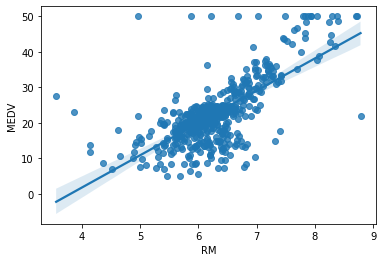

In [9]:
sns.regplot(x='RM', y='MEDV', data=housing, fit_reg=True)

In [10]:
model.intercept_ # 절편 

-36.24631889813795

In [11]:
model.coef_ # 기울기 (입력변수의 가중치 - 회귀계수)

array([9.34830141])

In [12]:
X_data.columns # 모형의 입력변수

Index(['RM'], dtype='object')

In [13]:
print('intercept : ', model.intercept_)

coeff = pd.Series(data=np.round(model.coef_, 5), index=X_data.columns)
print(coeff)
print('\n')
print('주택당 방의 개수가 1 증가할때마다 집값은 {:.2f}$ 증가한다'.format(coeff[0]*1000))

intercept :  -36.24631889813795
RM    9.3483
dtype: float64


주택당 방의 개수가 1 증가할때마다 집값은 9348.30$ 증가한다


In [14]:
coeff[0]

9.3483

### 2. 다중선형 회귀모델 - 3개의 예측변수

- 집 가격 ~ 방의 개수 + 저소득층 비율 + 교사/학생수 비율

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [15]:
y_target = housing['MEDV']
X_data = housing[['RM', 'LSTAT', 'PTRATIO']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

3) 모형의 성능 평가 : 예측 정확도와 설명력

In [17]:
# 학습한 데이터에 대한 모형의 정확도 평가
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [18]:
print("학습한 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_train))
print('설명력(R2) : {:.3f}'.format(r2_score(y_train, y_train_preds)))
print('\n')
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

학습한 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.219
설명력(R2) : 0.686


테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.207
설명력(R2) : 0.630


#### 모델의 해석 : 회귀계수를 통한 설명

In [19]:
model.intercept_ # 절편 

14.58809926157103

In [20]:
model.coef_ # 기울기 (입력변수의 가중치 - 회귀계수)

array([ 4.93311836, -0.56712588, -0.86709475])

In [21]:
X_data.columns # 모형의 입력변수

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

In [22]:
coeff = model.coef_

In [23]:
print('주택당 방의 개수가 1 증가할때마다 집값은 {:.2f}$ 증가한다'.format(coeff[0]*1000))
print('저소득층 비율이 1 증가할때마다 집값은 {:.2f}$ 감소한다'.format(coeff[1]*1000))
print('학생/교사 비율이 1 증가할때마다 집값은 {:.2f}$ 감소한다'.format(coeff[2]*1000))

주택당 방의 개수가 1 증가할때마다 집값은 4933.12$ 증가한다
저소득층 비율이 1 증가할때마다 집값은 -567.13$ 감소한다
학생/교사 비율이 1 증가할때마다 집값은 -867.09$ 감소한다


In [24]:
print('intercept : ', model.intercept_)

coeff = pd.Series(data=np.round(model.coef_, 5), index=X_data.columns)
print(coeff.sort_values(ascending=False))

intercept :  14.58809926157103
RM         4.93312
LSTAT     -0.56713
PTRATIO   -0.86709
dtype: float64


### 3. 변수 선택시 고려할 사항

- 집 가격 ~ 방의 개수 + 저소득층 비율 + 교사/학생수 비율 + 직업센터까지 거리
- MEDV ~ RM + LSTAT + PTRATIO + DIST

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [25]:
y_target = housing['MEDV']
X_data = housing[['RM', 'LSTAT', 'PTRATIO', 'DIS']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

3) 모형의 성능 평가 : 예측 정확도와 설명력

In [27]:
# 학습한 데이터에 대한 모형의 정확도 평가
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [28]:
print("학습한 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_train))
print('설명력(R2) : {:.3f}'.format(r2_score(y_train, y_train_preds)))
print('\n')
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

학습한 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.108
설명력(R2) : 0.700


테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.175
설명력(R2) : 0.635


4) 모형의 해석 : 회귀계수를 통한 설명

In [29]:
print(X_data.columns) # 모형의 입력변수
print('\n')
print(model.coef_) # 입력변수들의 가중치 (회귀계수)

Index(['RM', 'LSTAT', 'PTRATIO', 'DIS'], dtype='object')


[ 4.61315837 -0.66917998 -0.90671265 -0.58627081]


In [30]:
coeff = model.coef_

print('주택당 방의 개수가 1 증가할때마다 집값은 {:.2f}$ 증가한다'.format(coeff[0]*1000))
print('저소득층 비율이 1 증가할때마다 집값은 {:.2f}$ 감소한다'.format(coeff[1]*1000))
print('학생/교사 비율이 1 증가할때마다 집값은 {:.2f}$ 감소한다'.format(coeff[2]*1000))
print('직업센터까지의 거리가 1 증가할때마다 집값은 {:.2f}$ 감소한다'.format(coeff[3]*1000))

주택당 방의 개수가 1 증가할때마다 집값은 4613.16$ 증가한다
저소득층 비율이 1 증가할때마다 집값은 -669.18$ 감소한다
학생/교사 비율이 1 증가할때마다 집값은 -906.71$ 감소한다
직업센터까지의 거리가 1 증가할때마다 집값은 -586.27$ 감소한다


### 모델의 성능이 더 떨어질 때

- 집 가격 ~ 방의 개수 + 저소득층 비율 + 교사/학생수 비율 + 상업지역 비율
- MEDV ~ RM + LSTAT + PTRATIO + INDUS

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [31]:
y_target = housing['MEDV']
X_data = housing[['RM', 'LSTAT', 'PTRATIO', 'INDUS']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

3) 모형의 성능 평가 : 예측 정확도와 설명력

In [33]:
# 학습한 데이터에 대한 모형의 정확도 평가
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [34]:
print("학습한 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_train))
print('설명력(R2) : {:.3f}'.format(r2_score(y_train, y_train_preds)))
print('\n')
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

학습한 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.217
설명력(R2) : 0.687


테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 5.220
설명력(R2) : 0.628


4) 모형의 해석 : 회귀계수를 통한 설명

In [35]:
print('intercept : ', model.intercept_)

coeff = pd.Series(data=np.round(model.coef_, 5), index=X_data.columns)
print(coeff.sort_values(ascending=False))

intercept :  14.662952701432507
RM         4.93755
INDUS      0.02624
LSTAT     -0.58086
PTRATIO   -0.87911
dtype: float64


변수를 세개 사용한 이전 모델보다 정확도가 떨어지고(RMSE 증가) 설명력이 감소했다(R2 감소)
> 이 경우, 모형을 해석하기 전에 모형 자체를 검토해야 한다

### 참고 : 다중선형 모델의 시각화 이슈
> 2차원 이상의 시각화는 알아보기 어려움 (수식으로는 가능)

- 목적변수 1개, 설명변수 1개 : 
> 2차원(평면)의 데이터를 1차원(직선)으로 설명

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

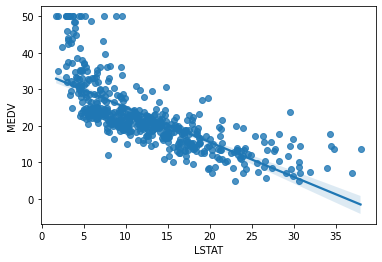

In [36]:
sns.regplot(x='LSTAT', y='MEDV', data=housing, fit_reg=True)

- 목적변수 1개, 설명변수 2개 : 
> 3차원(입체)의 데이터를 2차원(초평면)으로 설명

In [44]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

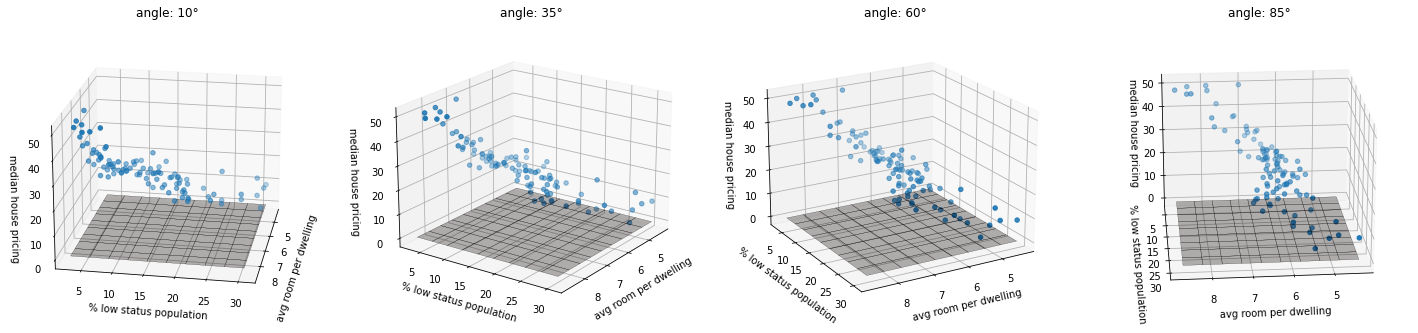

In [45]:
fig = plt.figure(figsize=(25, 8))

# 여러 각도에서 보기 위해 x, y, z축 각도 설정
xy_angles = [10, 35, 60, 85]
z_angle = 20

for i, angle in enumerate(xy_angles):
    n_columns = len(xy_angles)
    position = i + 1

    ax = fig.add_subplot(1, n_columns, position, projection='3d')

    ax.view_init(z_angle, angle)

    ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot, rstride=1, cstride=1,
                    alpha=0.3, linewidth=0.2, edgecolors='black')
    ax.scatter(x, y, z)

    ax.set_title('angle: {}°'.format(angle))
    ax.set_zlabel('median house pricing')
    ax.set_xlabel('avg room per dwelling')
    ax.set_ylabel('% low status population')

plt.show()

- 목적변수 1개, 설명변수 3개 : 
> 4차원의 데이터를 3차원으로 설명